### Copyright (C) 2020 Sobhan Moradiyan Daghigh - All Rights Reserved

## Data Mining UniProj - no.4
#### 1/6/2021

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import string
# nltk.download()

### Reading the dataset

In [2]:
quality = pd.read_excel('dataset/keifiat.xlsx')

In [3]:
len(quality['recommend'][quality['recommend'] == '\\N']), len(quality['recommend'][quality['recommend'] != '\\N']), 

(36382, 63618)

In [4]:
dataset = quality.filter(['product_id', 'comment', 'recommend']).copy()
dataset.head()

,product_id,comment,recommend
0,3692,واقعا عالیه. من که ازش خیلی راضیم,\N
1,90213,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,recommended
2,59473,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,not_recommended
3,120499,همه چیز در رابطه با ظاهر این گوشی بسیار خوب اس...,no_idea
4,67200,اگر ظرفیتش براتون کافیه حتما بخرید.\r\nیه شارژ...,no_idea


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   product_id  100000 non-null  int64 
 1   comment     99883 non-null   object
 2   recommend   100000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


In [6]:
dataset = dataset[dataset['recommend'] != '\\N']
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63618 entries, 1 to 99999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  63618 non-null  int64 
 1   comment     63586 non-null  object
 2   recommend   63618 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


In [7]:
dataset.dropna(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63586 entries, 1 to 99999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  63586 non-null  int64 
 1   comment     63586 non-null  object
 2   recommend   63586 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


In [8]:
dataset.to_csv('preprocessed_dataset.csv', index=False, encoding='utf-8-sig')

In [154]:
translated = pd.read_csv('translate_dataset.csv')
translated.head()

,product_id,comment,recommend,eng_comment
0,111178,در کل وسیله ای خوب و مورد نیاز است. اگر یک میل...,recommended,Overall a good and needed tool. If a flat bar ...
1,180451,تو خریدش شک نکنید،عالی و بسیار کاربردی,recommended,"Do not hesitate to buy it, excellent and very ..."
2,195191,فست شارژ داره که خیلی خوبه\r\nکیفیت بدنش عالیه...,recommended,"It has a fast charge, which is very good The ..."
3,195191,بیش از ۲ سال پیش از دیجی خریدم با وجود ناراضی...,recommended,"I bought it from Digi more than 2 years ago, d..."
4,180451,واقعا خیلی ازش راضی هستم\r\nبی نقص,recommended,I am really very satisfied with it flawless


In [155]:
# translated = translated.drop(['comment'], axis=1)
translated.head()

,product_id,comment,recommend,eng_comment
0,111178,در کل وسیله ای خوب و مورد نیاز است. اگر یک میل...,recommended,Overall a good and needed tool. If a flat bar ...
1,180451,تو خریدش شک نکنید،عالی و بسیار کاربردی,recommended,"Do not hesitate to buy it, excellent and very ..."
2,195191,فست شارژ داره که خیلی خوبه\r\nکیفیت بدنش عالیه...,recommended,"It has a fast charge, which is very good The ..."
3,195191,بیش از ۲ سال پیش از دیجی خریدم با وجود ناراضی...,recommended,"I bought it from Digi more than 2 years ago, d..."
4,180451,واقعا خیلی ازش راضی هستم\r\nبی نقص,recommended,I am really very satisfied with it flawless


In [156]:
translated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_id   1176 non-null   int64 
 1   comment      1176 non-null   object
 2   recommend    1176 non-null   object
 3   eng_comment  1176 non-null   object
dtypes: int64(1), object(3)
memory usage: 36.9+ KB


In [159]:
preprocessed_comments = []
for _, (recommend, comment) in translated.iloc[:, 2:4].iterrows():

    # Impress the recommend
#     comment += 2 * (recommend + ' ')
    comment += recommend

    # Lowercase
    comment = comment.lower()
    
    # Removing Punctuation
    comment = "".join([char for char in comment if char not in string.punctuation])
    
    # Word Tokenization
    comment = word_tokenize(comment)
    
    # Stopword Filtering
    stop_words = stopwords.words('english')
    [stop_words.remove(x) for x in ['not', 'very']]
    comment = [word for word in comment if word not in stop_words]
    
    # Filter 
    comment = pos_tag(comment)
    comment = [word for word, tag in comment if tag in ('RB', 'JJ', 'JJR' )]#'VB', 'VBN', 'VBD', 'VBP',
    
    # Stemming
    porter = PorterStemmer()
    comment = [porter.stem(word) for word in comment]
    
    preprocessed_comments.append(' '.join(comment))


In [160]:
preprocessed_comments

['overal flat shoulder better',
 'not excel veri practic',
 'fast veri good excel still healthi overal great not comment main',
 'ago xiaomi realli well shaki weight small',
 'realli veri satisfi',
 'realli honestli xiaomi great',
 'regular not everywher veri high special high also recommend',
 '',
 'also dj almost half batteri not take sea antiallerg complet',
 'watch good',
 'amp good comfort beauti effici veri well recommend',
 'not announc automat automat',
 'uniqu properli mayb fulli',
 'interest new updat english english updat mi fit also variou bluetooth poli mobil',
 'second great recommend',
 'well well luckili screen light veri weak not satisfi also',
 'amaz ago fulli high not constantli tavern quickli not good groov',
 'fulli gener later much cheap ordinari iranian not good not superior useless healthi',
 '',
 'almost veri satisfi complet almost also beauti modern modern hash veri beauti full beauti full real not handmad veri regular not use veri satisfi realli mosaic not ev

In [146]:
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(preprocessed_comments)

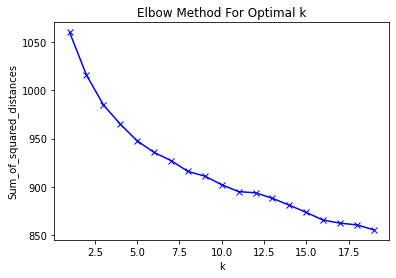

In [161]:
Sum_of_squared_distances = []
K = range(1,20)

for k in K:
   km = KMeans(n_clusters=k, max_iter=50, n_init=20)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [162]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=50, n_init=100)
model.fit(X)
labels=model.labels_

translated['cluster'] = labels
translated

,product_id,comment,recommend,eng_comment,cluster
0,111178,در کل وسیله ای خوب و مورد نیاز است. اگر یک میل...,recommended,Overall a good and needed tool. If a flat bar ...,0
1,180451,تو خریدش شک نکنید،عالی و بسیار کاربردی,recommended,"Do not hesitate to buy it, excellent and very ...",3
2,195191,فست شارژ داره که خیلی خوبه\r\nکیفیت بدنش عالیه...,recommended,"It has a fast charge, which is very good The ...",0
3,195191,بیش از ۲ سال پیش از دیجی خریدم با وجود ناراضی...,recommended,"I bought it from Digi more than 2 years ago, d...",0
4,180451,واقعا خیلی ازش راضی هستم\r\nبی نقص,recommended,I am really very satisfied with it flawless,1
...,...,...,...,...,...
1171,416458,در کل خوبه.,recommended,Overall good.,1
1172,416458,قسمت توری دارش باید لب توری کش داشته باشه که ش...,no_idea,The lace part should have a lace edge that hol...,0
1173,319878,نسبت به قیمتش خوش ساخت و با کیفیت هست. نسبت به...,recommended,It is well made and of good quality for its pr...,0
1174,416458,عالی من یک دو هفته ای میشه خریدم پیشنهاد میکنم...,recommended,"Excellent, I can buy it in a couple of weeks, ...",3


In [163]:
groups = translated.groupby(by='cluster')
groups.first()

,product_id,comment,recommend,eng_comment
cluster,,,,
0,111178,در کل وسیله ای خوب و مورد نیاز است. اگر یک میل...,recommended,Overall a good and needed tool. If a flat bar ...
1,180451,واقعا خیلی ازش راضی هستم\r\nبی نقص,recommended,I am really very satisfied with it flawless
2,195191,واقعا راضیم... انصافا شیائومی کارش عالیه.,recommended,"We are really satisfied ... Honestly, Xiaomi i..."
3,180451,تو خریدش شک نکنید،عالی و بسیار کاربردی,recommended,"Do not hesitate to buy it, excellent and very ..."
4,534138,خریدن این محصول مساوی با پول دور ریختن نه باتر...,not_recommended,Buying this product equals throwing away money...


In [164]:
for grp, pdf in groups:
    print("grp:", grp, "values:\n", pd.DataFrame(pdf['recommend'].tolist()).value_counts())

grp: 0 values:
 recommended        486
no_idea            154
not_recommended      5
dtype: int64
grp: 1 values:
 recommended    205
dtype: int64
grp: 2 values:
 recommended    111
no_idea          4
dtype: int64
grp: 3 values:
 recommended    66
dtype: int64
grp: 4 values:
 not_recommended    145
dtype: int64


In [141]:
for grp, pdf in groups:
    if grp == 9:
        print("values:\n", pd.DataFrame(pdf['eng_comment'].tolist()))

KeyError: 'comment'

In [19]:
translated[]

SyntaxError: invalid syntax (<ipython-input-19-a70184031d5f>, line 1)

In [ ]:
def claculate_score():
    